In [1]:
from google.colab import drive
import gdown
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from shutil import copyfile
import matplotlib.pyplot as plt
import sys
import tensorflow_hub as hub
from PIL import Image
sys.modules['Image'] = Image

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8912163135958774238
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9869220533314237697
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


**Prepare Dataset**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the paths
zip_file_path = '/content/drive/My Drive/Bangkit/plastic_waste_new.zip'  # Replace with the actual path to your ZIP file in Google Drive
destination_dir = '/content/data/'  # Path where you want to extract the files
destination_dir1 = '/content/data1/'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

base_path = '/content/data/plastic/'

In [6]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir1)

base_path1 = '/content/data1/plastic/'

In [7]:
if os.path.exists(base_path):
    labels = os.listdir(base_path)
    print("Labels:", labels)
else:
    print(f"The directory {base_path} does not exist.")

Labels: ['galon', 'ember', 'botol', 'container', 'sedotan', 'toples', 'bubblewrap', 'cup', 'piring', 'plastik kemasan', 'kantong plastik', 'mika', 'derigen', 'tube']


In [8]:
if os.path.exists(base_path1):
    labels = os.listdir(base_path1)
    print("Labels:", labels)
else:
    print(f"The directory {base_path1} does not exist.")

Labels: ['galon', 'ember', 'botol', 'container', 'sedotan', 'toples', 'bubblewrap', 'cup', 'piring', 'plastik kemasan', 'kantong plastik', 'mika', 'derigen', 'tube']


In [9]:
IMAGE_SIZE = (224,224)

In [10]:
source_path = '/content/data/plastic/'

source_path_botol = os.path.join(source_path, 'botol')
source_path_bubblewrap = os.path.join(source_path, 'bubblewrap')
source_path_container = os.path.join(source_path, 'container')
source_path_cup = os.path.join(source_path, 'cup')
source_path_derigen = os.path.join(source_path, 'derigen')
source_path_ember = os.path.join(source_path, 'ember')
source_path_galon = os.path.join(source_path, 'galon')
source_path_kantong_plastik = os.path.join(source_path, 'kantong plastik')
source_path_mika = os.path.join(source_path, 'mika')
source_path_piring = os.path.join(source_path, 'piring')
source_path_plastik_kemasan = os.path.join(source_path, 'plastik kemasan')
source_path_sedotan = os.path.join(source_path, 'sedotan')
source_path_toples = os.path.join(source_path, 'toples')
source_path_tube = os.path.join(source_path, 'tube')

print(f"There are {len(os.listdir(source_path_botol))} images of botol.")
print(f"There are {len(os.listdir(source_path_bubblewrap))} images of bubblewrap.")
print(f"There are {len(os.listdir(source_path_container))} images of container.")
print(f"There are {len(os.listdir(source_path_cup))} images of cup.")
print(f"There are {len(os.listdir(source_path_derigen))} images of derigen.")
print(f"There are {len(os.listdir(source_path_ember))} images of ember.")
print(f"There are {len(os.listdir(source_path_galon))} images of galon.")
print(f"There are {len(os.listdir(source_path_kantong_plastik))} images of kantong plastik.")
print(f"There are {len(os.listdir(source_path_mika))} images of mika.")
print(f"There are {len(os.listdir(source_path_piring))} images of piring.")
print(f"There are {len(os.listdir(source_path_plastik_kemasan))} images of plastik kemasan.")
print(f"There are {len(os.listdir(source_path_sedotan))} images of sedotan.")
print(f"There are {len(os.listdir(source_path_toples))} images of toples.")
print(f"There are {len(os.listdir(source_path_tube))} images of tube.")

There are 462 images of botol.
There are 211 images of bubblewrap.
There are 147 images of container.
There are 696 images of cup.
There are 196 images of derigen.
There are 238 images of ember.
There are 115 images of galon.
There are 337 images of kantong plastik.
There are 193 images of mika.
There are 122 images of piring.
There are 255 images of plastik kemasan.
There are 177 images of sedotan.
There are 195 images of toples.
There are 390 images of tube.


In [11]:
root_dir = '/content/data/plastic/'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_path = os.path.join(root_path, 'training')
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(os.path.join(train_path, 'botol'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'bubblewrap'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'container'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'cup'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'derigen'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'ember'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'galon'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'kantong plastik'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'mika'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'piring'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'plastik kemasan'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'sedotan'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'toples'), exist_ok=True)
  os.makedirs(os.path.join(train_path, 'tube'), exist_ok=True)

  validation_path = os.path.join(root_path, 'validation')
  os.makedirs(validation_path, exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'botol'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'bubblewrap'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'container'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'cup'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'derigen'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'ember'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'galon'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'kantong plastik'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'mika'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'piring'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'plastik kemasan'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'sedotan'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'toples'), exist_ok=True)
  os.makedirs(os.path.join(validation_path, 'tube'), exist_ok=True)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print(f"The folder and file is already existe on the {root_dir}")

In [12]:
# Check current parent and child directory of root_dir
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/data/plastic/training
/content/data/plastic/validation
/content/data/plastic/training/galon
/content/data/plastic/training/ember
/content/data/plastic/training/botol
/content/data/plastic/training/container
/content/data/plastic/training/sedotan
/content/data/plastic/training/toples
/content/data/plastic/training/bubblewrap
/content/data/plastic/training/cup
/content/data/plastic/training/piring
/content/data/plastic/training/plastik kemasan
/content/data/plastic/training/kantong plastik
/content/data/plastic/training/mika
/content/data/plastic/training/derigen
/content/data/plastic/training/tube
/content/data/plastic/validation/galon
/content/data/plastic/validation/ember
/content/data/plastic/validation/botol
/content/data/plastic/validation/container
/content/data/plastic/validation/sedotan
/content/data/plastic/validation/toples
/content/data/plastic/validation/bubblewrap
/content/data/plastic/validation/cup
/content/data/plastic/validation/piring
/content/data/plastic/val

In [13]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  filenames = os.listdir(SOURCE_DIR)

  random.shuffle(filenames)

  split_index = int(SPLIT_SIZE * len(filenames))

  training_filenames = filenames[:split_index]
  validation_filenames = filenames[split_index:]

  for filename in training_filenames:
    source = os.path.join(SOURCE_DIR, filename)
    destination = os.path.join(TRAINING_DIR, filename)
    shutil.copyfile(source, destination)

  for filename in validation_filenames:
    source = os.path.join(SOURCE_DIR, filename)
    destination = os.path.join(VALIDATION_DIR, filename)
    shutil.copyfile(source, destination)

In [14]:
BOTOL_SOURCE_DIR = "/content/data1/plastic/botol/"
BUBBLEWRAP_SOURCE_DIR = "/content/data1/plastic/bubblewrap/"
CONTAINER_SOURCE_DIR = "/content/data1/plastic/container/"
CUP_SOURCE_DIR = "/content/data1/plastic/cup/"
DERIGEN_SOURCE_DIR = "/content/data1/plastic/derigen/"
EMBER_SOURCE_DIR = "/content/data1/plastic/ember/"
GALON_SOURCE_DIR = "/content/data1/plastic/galon/"
KANTONG_PLASTIK_SOURCE_DIR = "/content/data1/plastic/kantong plastik/"
MIKA_SOURCE_DIR = "/content/data1/plastic/mika/"
PIRING_SOURCE_DIR = "/content/data1/plastic/piring/"
PLASTIK_KEMASAN_SOURCE_DIR = "/content/data1/plastic/plastik kemasan/"
SEDOTAN_SOURCE_DIR = "/content/data1/plastic/sedotan/"
TOPLES_SOURCE_DIR = "/content/data1/plastic/toples/"
TUBE_SOURCE_DIR = "/content/data1/plastic/tube/"

In [15]:
TRAINING_DIR = "/content/data/plastic/training/"
VALIDATION_DIR = "/content/data/plastic/validation/"

TRAINING_BOTOL_DIR = os.path.join(TRAINING_DIR, "botol/")
VALIDATION_BOTOL_DIR = os.path.join(VALIDATION_DIR, "botol/")

TRAINING_BUBBLEWRAP_DIR = os.path.join(TRAINING_DIR, "bubblewrap/")
VALIDATION_BUBBLEWRAP_DIR = os.path.join(VALIDATION_DIR, "bubblewrap/")

TRAINING_CONTAINER_DIR = os.path.join(TRAINING_DIR, "container/")
VALIDATION_CONTAINER_DIR = os.path.join(VALIDATION_DIR, "container/")

TRAINING_CUP_DIR = os.path.join(TRAINING_DIR, "cup/")
VALIDATION_CUP_DIR = os.path.join(VALIDATION_DIR, "cup/")

TRAINING_DERIGEN_DIR = os.path.join(TRAINING_DIR, "derigen/")
VALIDATION_DERIGEN_DIR = os.path.join(VALIDATION_DIR, "derigen/")

TRAINING_EMBER_DIR = os.path.join(TRAINING_DIR, "ember/")
VALIDATION_EMBER_DIR = os.path.join(VALIDATION_DIR, "ember/")

TRAINING_GALON_DIR = os.path.join(TRAINING_DIR, "galon/")
VALIDATION_GALON_DIR = os.path.join(VALIDATION_DIR, "galon/")

TRAINING_KANTONG_PLASTIK_DIR = os.path.join(TRAINING_DIR, "kantong plastik/")
VALIDATION_KANTONG_PLASTIK_DIR = os.path.join(VALIDATION_DIR, "kantong plastik/")

TRAINING_MIKA_DIR = os.path.join(TRAINING_DIR, "mika/")
VALIDATION_MIKA_DIR = os.path.join(VALIDATION_DIR, "mika/")

TRAINING_PIRING_DIR = os.path.join(TRAINING_DIR, "piring/")
VALIDATION_PIRING_DIR = os.path.join(VALIDATION_DIR, "piring/")

TRAINING_PLASTIK_KEMASAN_DIR = os.path.join(TRAINING_DIR, "plastik kemasan/")
VALIDATION_PLASTIK_KEMASAN_DIR = os.path.join(VALIDATION_DIR, "plastik kemasan/")

TRAINING_SEDOTAN_DIR = os.path.join(TRAINING_DIR, "sedotan/")
VALIDATION_SEDOTAN_DIR = os.path.join(VALIDATION_DIR, "sedotan/")

TRAINING_TOPLES_DIR = os.path.join(TRAINING_DIR, "toples/")
VALIDATION_TOPLES_DIR = os.path.join(VALIDATION_DIR, "toples/")

TRAINING_TUBE_DIR = os.path.join(TRAINING_DIR, "tube/")
VALIDATION_TUBE_DIR = os.path.join(VALIDATION_DIR, "tube/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BOTOL_DIR)) > 0:
  for file in os.scandir(TRAINING_BOTOL_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BUBBLEWRAP_DIR)) > 0:
  for file in os.scandir(TRAINING_BUBBLEWRAP_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_CONTAINER_DIR)) > 0:
  for file in os.scandir(TRAINING_CONTAINER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_CUP_DIR)) > 0:
  for file in os.scandir(TRAINING_CUP_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DERIGEN_DIR)) > 0:
  for file in os.scandir(TRAINING_DERIGEN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_EMBER_DIR)) > 0:
  for file in os.scandir(TRAINING_EMBER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GALON_DIR)) > 0:
  for file in os.scandir(TRAINING_GALON_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KANTONG_PLASTIK_DIR)) > 0:
  for file in os.scandir(TRAINING_KANTONG_PLASTIK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MIKA_DIR)) > 0:
  for file in os.scandir(TRAINING_MIKA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PIRING_DIR)) > 0:
  for file in os.scandir(TRAINING_PIRING_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PLASTIK_KEMASAN_DIR)) > 0:
  for file in os.scandir(TRAINING_PLASTIK_KEMASAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SEDOTAN_DIR)) > 0:
  for file in os.scandir(TRAINING_SEDOTAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TOPLES_DIR)) > 0:
  for file in os.scandir(TRAINING_TOPLES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TUBE_DIR)) > 0:
  for file in os.scandir(TRAINING_TUBE_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_BOTOL_DIR)) > 0:
  for file in os.scandir(VALIDATION_BOTOL_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BUBBLEWRAP_DIR)) > 0:
  for file in os.scandir(VALIDATION_BUBBLEWRAP_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CONTAINER_DIR)) > 0:
  for file in os.scandir(VALIDATION_CONTAINER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CUP_DIR)) > 0:
  for file in os.scandir(VALIDATION_CUP_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DERIGEN_DIR)) > 0:
  for file in os.scandir(VALIDATION_DERIGEN_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_EMBER_DIR)) > 0:
  for file in os.scandir(VALIDATION_EMBER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_GALON_DIR)) > 0:
  for file in os.scandir(VALIDATION_GALON_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KANTONG_PLASTIK_DIR)) > 0:
  for file in os.scandir(VALIDATION_KANTONG_PLASTIK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_MIKA_DIR)) > 0:
  for file in os.scandir(VALIDATION_MIKA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PIRING_DIR)) > 0:
  for file in os.scandir(VALIDATION_PIRING_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PLASTIK_KEMASAN_DIR)) > 0:
  for file in os.scandir(VALIDATION_PLASTIK_KEMASAN_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SEDOTAN_DIR)) > 0:
  for file in os.scandir(VALIDATION_SEDOTAN_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TOPLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_TOPLES_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TUBE_DIR)) > 0:
  for file in os.scandir(VALIDATION_TUBE_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8
split_data(BOTOL_SOURCE_DIR, TRAINING_BOTOL_DIR, VALIDATION_BOTOL_DIR, split_size)
split_data(BUBBLEWRAP_SOURCE_DIR, TRAINING_BUBBLEWRAP_DIR, VALIDATION_BUBBLEWRAP_DIR, split_size)
split_data(CONTAINER_SOURCE_DIR, TRAINING_CONTAINER_DIR, VALIDATION_CONTAINER_DIR, split_size)
split_data(CUP_SOURCE_DIR, TRAINING_CUP_DIR, VALIDATION_CUP_DIR, split_size)
split_data(DERIGEN_SOURCE_DIR, TRAINING_DERIGEN_DIR, VALIDATION_DERIGEN_DIR, split_size)
split_data(EMBER_SOURCE_DIR, TRAINING_EMBER_DIR, VALIDATION_EMBER_DIR, split_size)
split_data(GALON_SOURCE_DIR, TRAINING_GALON_DIR, VALIDATION_GALON_DIR, split_size)
split_data(KANTONG_PLASTIK_SOURCE_DIR, TRAINING_KANTONG_PLASTIK_DIR, VALIDATION_KANTONG_PLASTIK_DIR, split_size)
split_data(MIKA_SOURCE_DIR, TRAINING_MIKA_DIR, VALIDATION_MIKA_DIR, split_size)
split_data(PIRING_SOURCE_DIR, TRAINING_PIRING_DIR, VALIDATION_PIRING_DIR, split_size)
split_data(PLASTIK_KEMASAN_SOURCE_DIR, TRAINING_PLASTIK_KEMASAN_DIR, VALIDATION_PLASTIK_KEMASAN_DIR, split_size)
split_data(SEDOTAN_SOURCE_DIR, TRAINING_SEDOTAN_DIR, VALIDATION_SEDOTAN_DIR, split_size)
split_data(TOPLES_SOURCE_DIR, TRAINING_TOPLES_DIR, VALIDATION_TOPLES_DIR, split_size)
split_data(TUBE_SOURCE_DIR, TRAINING_TUBE_DIR, VALIDATION_TUBE_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original botol directory has {len(os.listdir(BOTOL_SOURCE_DIR))} images")
print(f"Original bubblewrap directory has {len(os.listdir(BUBBLEWRAP_SOURCE_DIR))} images")
print(f"Original container directory has {len(os.listdir(CONTAINER_SOURCE_DIR))} images")
print(f"Original cup directory has {len(os.listdir(CUP_SOURCE_DIR))} images")
print(f"Original derigen directory has {len(os.listdir(DERIGEN_SOURCE_DIR))} images")
print(f"Original ember directory has {len(os.listdir(EMBER_SOURCE_DIR))} images")
print(f"Original galon directory has {len(os.listdir(GALON_SOURCE_DIR))} images")
print(f"Original kantong plastik directory has {len(os.listdir(KANTONG_PLASTIK_SOURCE_DIR))} images")
print(f"Original mika directory has {len(os.listdir(MIKA_SOURCE_DIR))} images")
print(f"Original piring directory has {len(os.listdir(PIRING_SOURCE_DIR))} images")
print(f"Original plastik kemasan directory has {len(os.listdir(PLASTIK_KEMASAN_SOURCE_DIR))} images")
print(f"Original sedotan directory has {len(os.listdir(SEDOTAN_SOURCE_DIR))} images")
print(f"Original toples directory has {len(os.listdir(TOPLES_SOURCE_DIR))} images")
print(f"Original tube directory has {len(os.listdir(TUBE_SOURCE_DIR))} images")
print()

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BOTOL_DIR))} images of botol for training")
print(f"There are {len(os.listdir(TRAINING_BUBBLEWRAP_DIR))} images of bubblewrap for training")
print(f"There are {len(os.listdir(TRAINING_CONTAINER_DIR))} images of container for training")
print(f"There are {len(os.listdir(TRAINING_CUP_DIR))} images of cup for training")
print(f"There are {len(os.listdir(TRAINING_DERIGEN_DIR))} images of derigen for training")
print(f"There are {len(os.listdir(TRAINING_EMBER_DIR))} images of ember for training")
print(f"There are {len(os.listdir(TRAINING_GALON_DIR))} images of galon for training")
print(f"There are {len(os.listdir(TRAINING_KANTONG_PLASTIK_DIR))} images of kantong plastik for training")
print(f"There are {len(os.listdir(TRAINING_MIKA_DIR))} images of mika for training")
print(f"There are {len(os.listdir(TRAINING_PIRING_DIR))} images of piring for training")
print(f"There are {len(os.listdir(TRAINING_PLASTIK_KEMASAN_DIR))} images of plastik kemasan for training")
print(f"There are {len(os.listdir(TRAINING_SEDOTAN_DIR))} images of sedotan for training")
print(f"There are {len(os.listdir(TRAINING_TOPLES_DIR))} images of toples for training")
print(f"There are {len(os.listdir(TRAINING_TUBE_DIR))} images of tube for training")

print(f"There are {len(os.listdir(VALIDATION_BOTOL_DIR))} images of botol for validation")
print(f"There are {len(os.listdir(VALIDATION_BUBBLEWRAP_DIR))} images of bubblewrap for validation")
print(f"There are {len(os.listdir(VALIDATION_CONTAINER_DIR))} images of container for validation")
print(f"There are {len(os.listdir(VALIDATION_CUP_DIR))} images of cup for validation")
print(f"There are {len(os.listdir(VALIDATION_DERIGEN_DIR))} images of derigen for validation")
print(f"There are {len(os.listdir(VALIDATION_EMBER_DIR))} images of ember for validation")
print(f"There are {len(os.listdir(VALIDATION_GALON_DIR))} images of galon for validation")
print(f"There are {len(os.listdir(VALIDATION_KANTONG_PLASTIK_DIR))} images of kantong plastik for validation")
print(f"There are {len(os.listdir(VALIDATION_MIKA_DIR))} images of mika for validation")
print(f"There are {len(os.listdir(VALIDATION_PIRING_DIR))} images of piring for validation")
print(f"There are {len(os.listdir(VALIDATION_PLASTIK_KEMASAN_DIR))} images of plastik kemasan for validation")
print(f"There are {len(os.listdir(VALIDATION_SEDOTAN_DIR))} images of sedotan for validation")
print(f"There are {len(os.listdir(VALIDATION_TOPLES_DIR))} images of toples for validation")
print(f"There are {len(os.listdir(VALIDATION_TUBE_DIR))} images of tube for validation")

Original botol directory has 462 images
Original bubblewrap directory has 211 images
Original container directory has 147 images
Original cup directory has 696 images
Original derigen directory has 196 images
Original ember directory has 238 images
Original galon directory has 115 images
Original kantong plastik directory has 337 images
Original mika directory has 193 images
Original piring directory has 122 images
Original plastik kemasan directory has 255 images
Original sedotan directory has 177 images
Original toples directory has 195 images
Original tube directory has 390 images

There are 369 images of botol for training
There are 168 images of bubblewrap for training
There are 117 images of container for training
There are 556 images of cup for training
There are 156 images of derigen for training
There are 190 images of ember for training
There are 92 images of galon for training
There are 269 images of kantong plastik for training
There are 154 images of mika for training
Ther

In [16]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1. / 255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      brightness_range=(0.8, 1.2),
                                      fill_mode="nearest")
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator

In [17]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2980 images belonging to 14 classes.
Found 753 images belonging to 14 classes.


**MODEL DENGAN TRANSFER LEARNING**

In [18]:
# Load the base model
base_model = VGG16(include_top=False, weights="imagenet", input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
def create_vgg_model(base_model, num_classes=14):
  # Freeze previous model
  for layer in base_model.layers:
    layer.trainable = False

  # Create the classifier model
  model = tf.keras.models.Sequential()
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [20]:
import tensorflow as tf
tf.test.is_gpu_available() #should return True
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Num GPUs Available:  1


In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

def create_vgg_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

base_model = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
num_classes = 14
model = create_vgg_model(base_model, num_classes)
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=(0.8, 1.2),
        fill_mode="nearest"
    )
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(224, 224)
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        class_mode='categorical',
        target_size=(224, 224)
    )
    return train_generator, validation_generator

TRAINING_DIR = "/content/data/plastic/training/"
VALIDATION_DIR = "/content/data/plastic/validation/"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Found 2980 images belonging to 14 classes.
Found 753 images belonging to 14 classes.
Epoch 1/15
94/94 [==============================] - 115s 925ms/step - loss: 5.2680 - accuracy: 0.3000 - val_loss: 4.3834 - val_accuracy: 0.4661 - lr: 1.0000e-04
Epoch 2/15
94/94 [==============================] - 80s 849ms/step - loss: 4.0603 - accuracy: 0.4906 - val_loss: 3.3215 - val_accuracy: 0.6454 - lr: 1.0000e-04
Epoch 3/15
94/94 [==============================] - 77s 823ms/step - loss: 3.2991 - accuracy: 0.6007 - val_loss: 2.9160 - val_accuracy: 0.6906 - lr: 1.0000e-04
Epoch 4/15
94/94 [==============================] - 78s 834ms/step - loss: 2.7133 - accuracy: 0.6913 - val_loss: 2.3168 - val_accuracy: 0.7769 - lr: 1.0000e-04
Epoch 5/15
94/94 [==============================] - 80s 843ms/step - loss: 2.3511 - accuracy: 0.7352 - val_loss: 1.9531 - val_accuracy: 0.8274 - lr: 1.0000e-04
Epoch 6/15
94/94 [==============================] - 78s 830ms/step - loss: 2.0201 - accuracy: 0.7842 - val_loss: 1

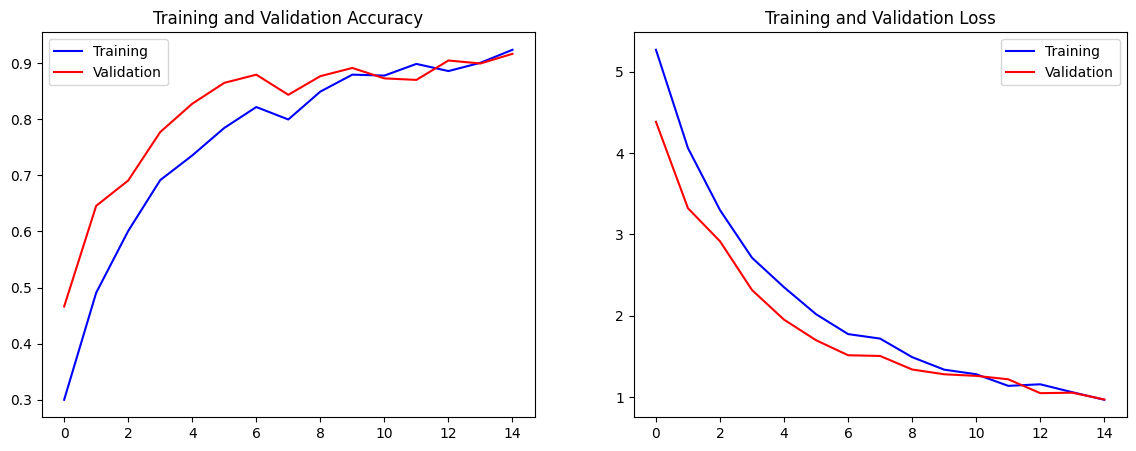

In [22]:
plt.figure(figsize=(14, 5))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot visualization
plt.subplot(1, 2, 1)
accuracy_plot, = plt.plot(epochs, accuracy, color="blue")
val_accuracy_plot, = plt.plot(epochs, val_accuracy, color="red")
plt.title('Training and Validation Accuracy')
plt.legend([accuracy_plot, val_accuracy_plot],['Training', 'Validation'])


plt.subplot(1, 2, 2)
loss_plot, = plt.plot(epochs, loss, color="blue")
val_loss_plot, = plt.plot(epochs, val_loss, color="red")
plt.title('Training and Validation Loss')
plt.legend([loss_plot, val_loss_plot],['Training', 'Validation'])

In [23]:
model.save('model_tl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import tensorflow as tf

# Memuat model dari file .h5
model_tl = tf.keras.models.load_model('model_tl.h5')

# Mengonversi model Keras menjadi model TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_tl)
tflite_model = converter.convert()

# Menyimpan model TFLite ke dalam file
with open('model_tl.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model telah berhasil dikonversi dan disimpan dalam format TFLite.")

Model telah berhasil dikonversi dan disimpan dalam format TFLite.


In [25]:
from tensorflow.keras.models import model_from_json

# Misalnya, model Anda adalah 'model'
model_json = model.to_json()
with open("model_tl.json", "w") as json_file:
    json_file.write(model_json)

**Initial Model tanpa Transfer Learning**

In [26]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

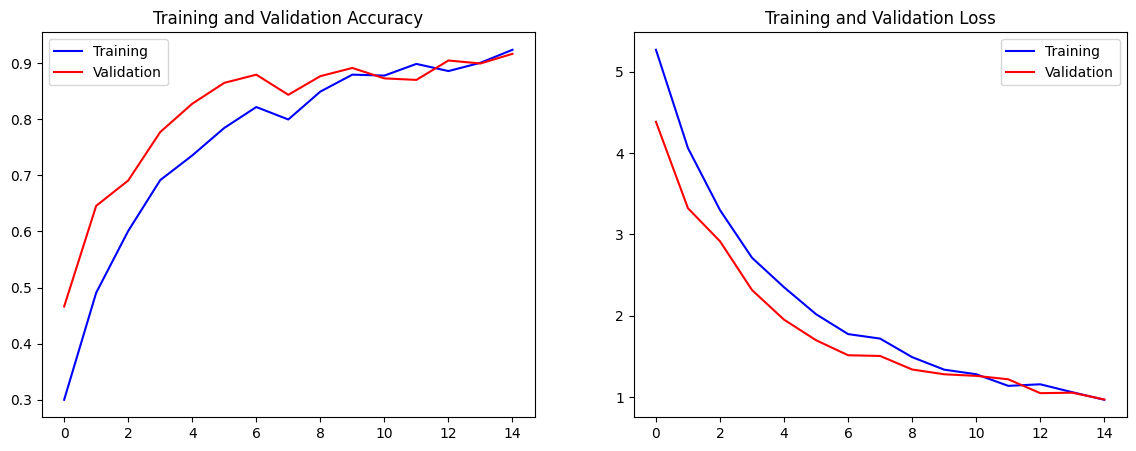

In [27]:
plt.figure(figsize=(14, 5))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot visualization
plt.subplot(1, 2, 1)
accuracy_plot, = plt.plot(epochs, accuracy, color="blue")
val_accuracy_plot, = plt.plot(epochs, val_accuracy, color="red")
plt.title('Training and Validation Accuracy')
plt.legend([accuracy_plot, val_accuracy_plot],['Training', 'Validation'])


plt.subplot(1, 2, 2)
loss_plot, = plt.plot(epochs, loss, color="blue")
val_loss_plot, = plt.plot(epochs, val_loss, color="red")
plt.title('Training and Validation Loss')
plt.legend([loss_plot, val_loss_plot],['Training', 'Validation'])

In [28]:
model.save('initial_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)